<a href="https://colab.research.google.com/github/itsarshan/-DELHI-AQI-ML-Project/blob/main/Air_quality_Index_(Delhi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Loading the Dataset

In [ ]:
data = pd.read_csv("airqualityindex.csv")
print("First 5 rows of dataset:")
print(data.head())


First 5 rows of dataset:
   Date  Month  Year  Holidays_Count  Days   PM2.5    PM10     NO2    SO2  \
0     1      1  2021               0     5  408.80  442.42  160.61  12.95   
1     2      1  2021               0     6  404.04  561.95   52.85   5.18   
2     3      1  2021               1     7  225.07  239.04  170.95  10.93   
3     4      1  2021               0     1   89.55  132.08  153.98  10.42   
4     5      1  2021               0     2   54.06   55.54  122.66   9.70   

     CO  Ozone  AQI  
0  2.77  43.19  462  
1  2.60  16.43  482  
2  1.40  44.29  263  
3  1.01  49.19  207  
4  0.64  48.88  149  


Data Preprocessing

In [ ]:
data = data.dropna()

# Standardize column names (lowercase, no spaces)
data.columns = [col.strip().lower() for col in data.columns]

print("\nColumn names after cleaning:")
print(data.columns)


Column names after cleaning:
Index(['date', 'month', 'year', 'holidays_count', 'days', 'pm2.5', 'pm10',
       'no2', 'so2', 'co', 'ozone', 'aqi'],
      dtype='object')


Exploratory Data Analysis (EDA)

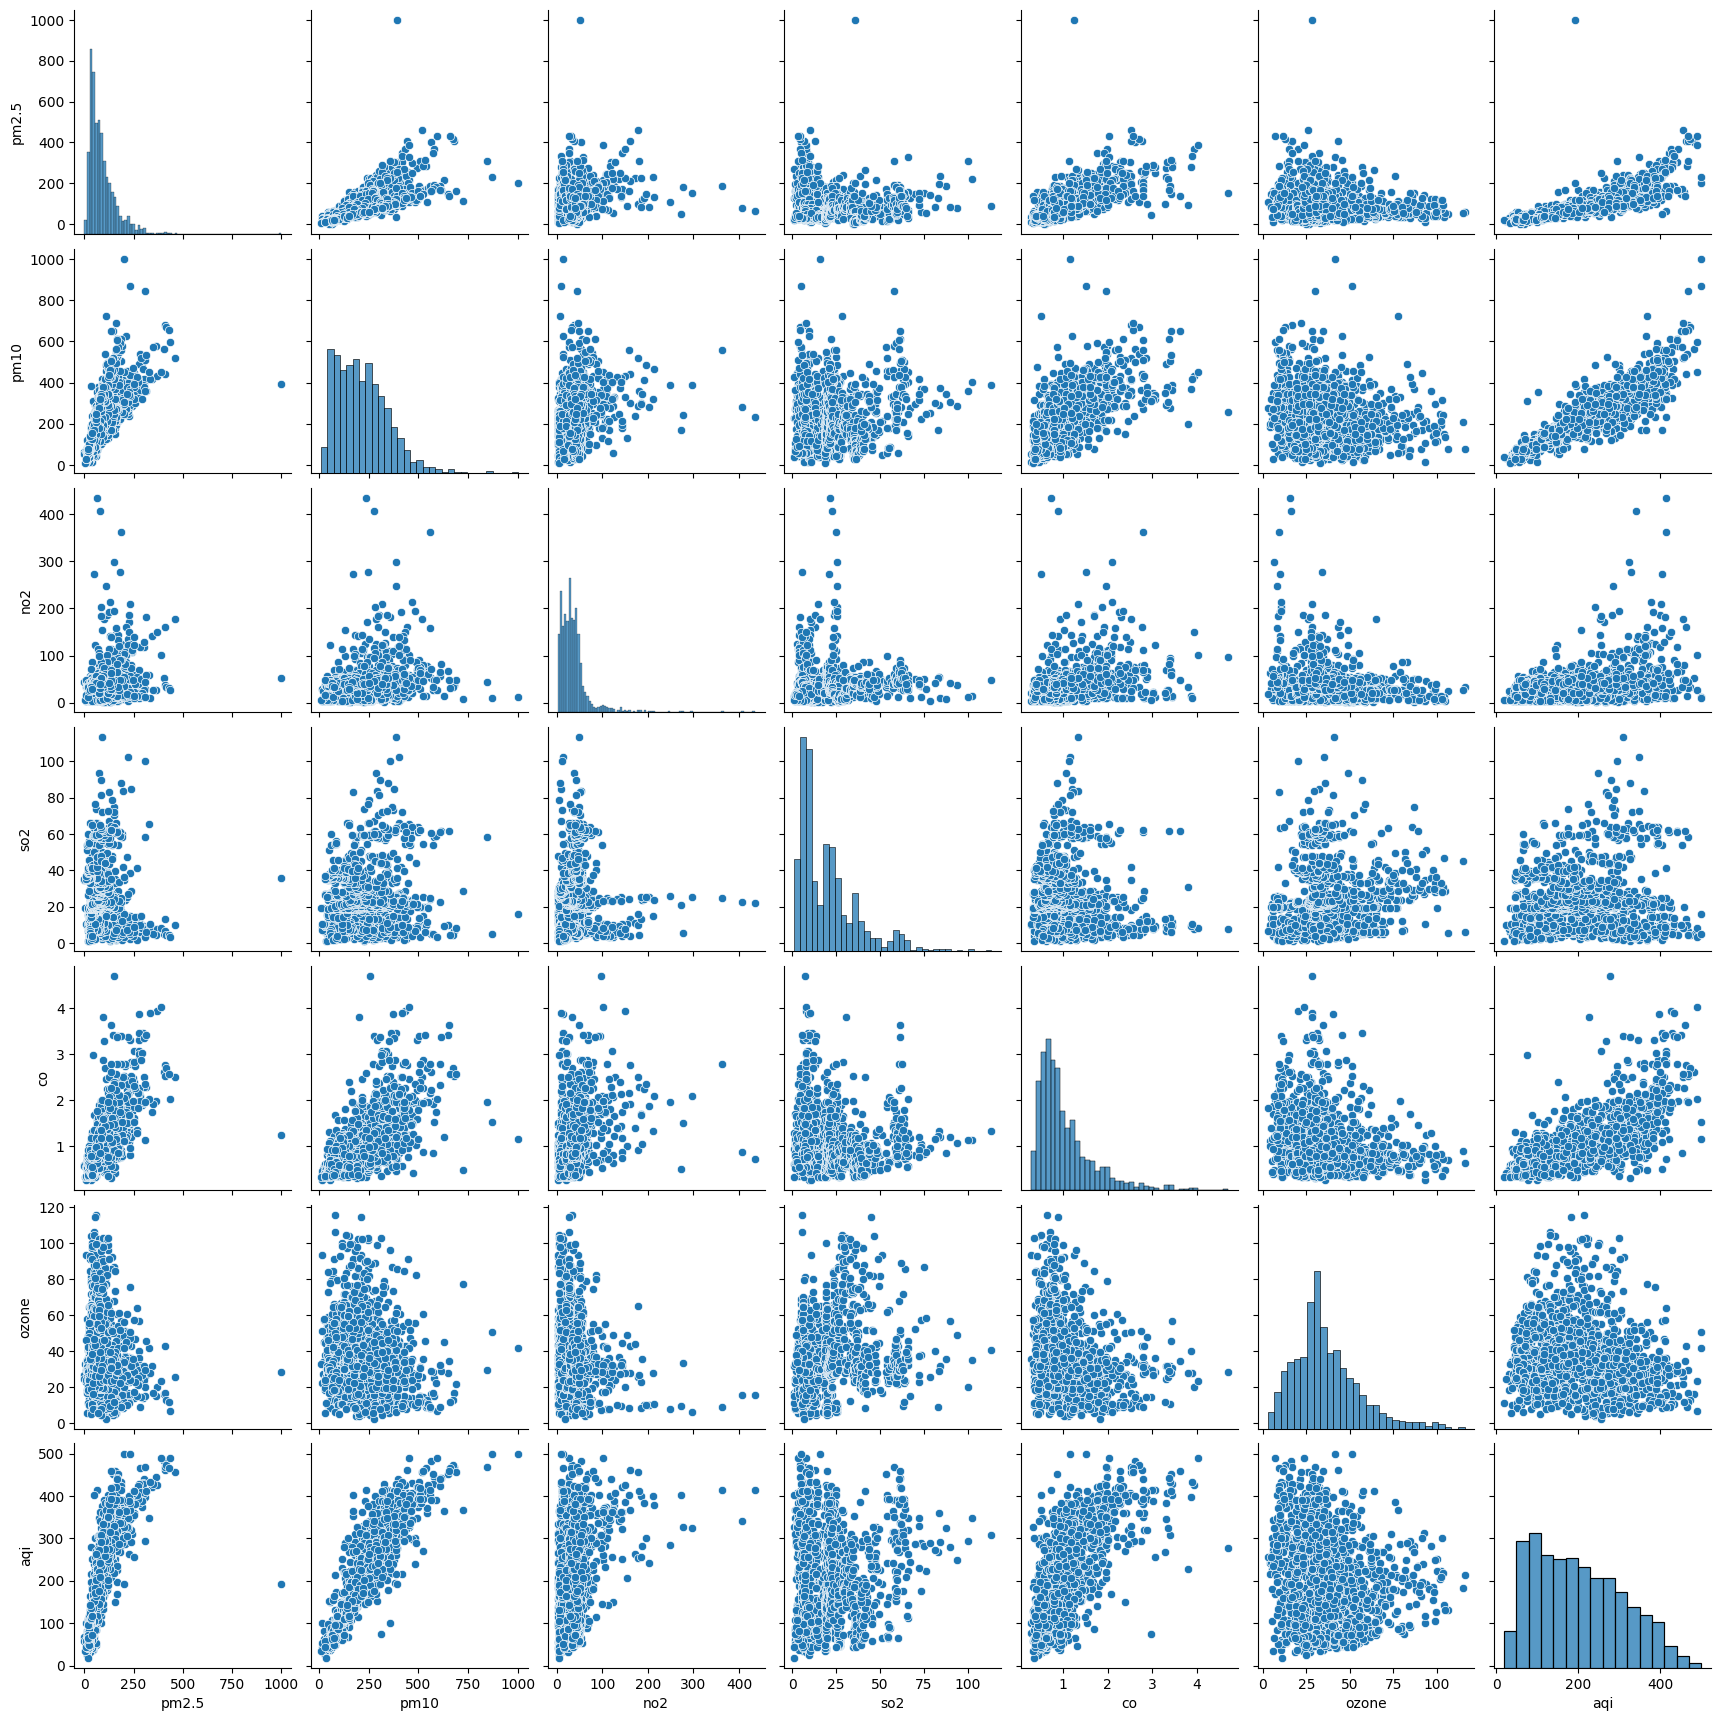

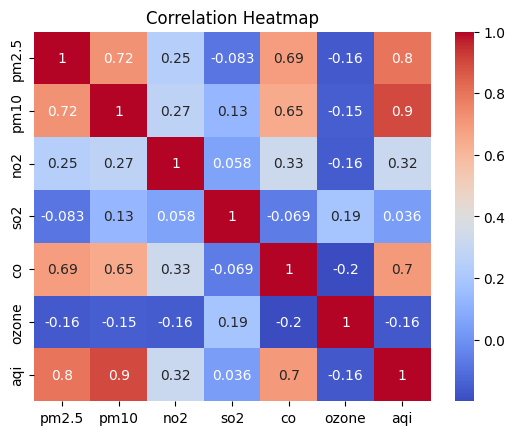

In [ ]:
sns.pairplot(data[['pm2.5', 'pm10', 'no2', 'so2', 'co', 'ozone', 'aqi']])
plt.show()

# Correlation heatmap
corr = data[['pm2.5', 'pm10', 'no2', 'so2', 'co', 'ozone', 'aqi']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Feature Selection

In [ ]:
X = data[['pm2.5', 'pm10', 'no2', 'so2', 'co', 'ozone']]
y = data['aqi']

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Model Training (Random Forest)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Model Evaluation

In [ ]:
y_pred = model.predict(X_test)

print("\nModel Evaluation Metrics:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Model Evaluation Metrics:
Mean Absolute Error: 18.60976109215017
Mean Squared Error: 848.1211180887371
R2 Score: 0.9346423496681403


Plotting Results

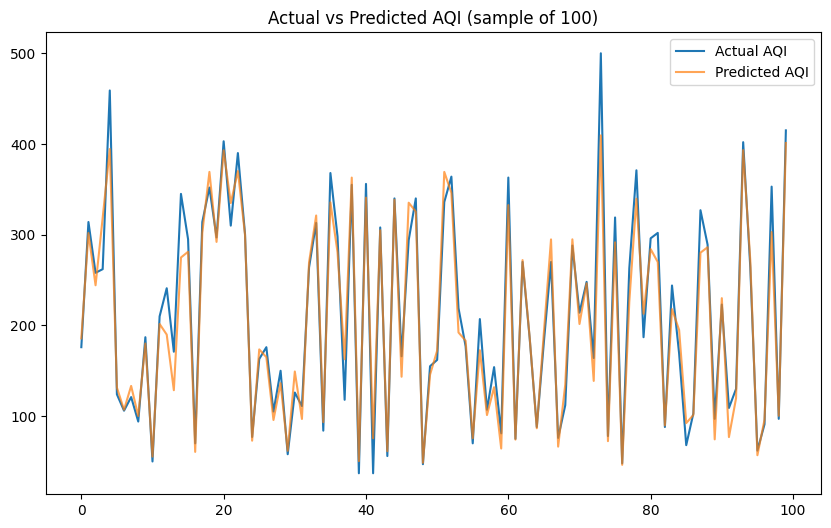

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual AQI')   # only first 100 for clarity
plt.plot(y_pred[:100], label='Predicted AQI', alpha=0.7)
plt.title('Actual vs Predicted AQI (sample of 100)')
plt.legend()
plt.show()